In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from time import time
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
tf.keras.backend.set_floatx('float64')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from utilities import EdwinRueda_utils
%matplotlib inline
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)

tensorflow version:  2.2.0
numpy version:  1.18.1
matplotlib version:  3.1.1
sklearn version:  0.23.2


<center> <h1> Proposed Method - GAN architecture</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

-----------------
Proposed Method
-----------------


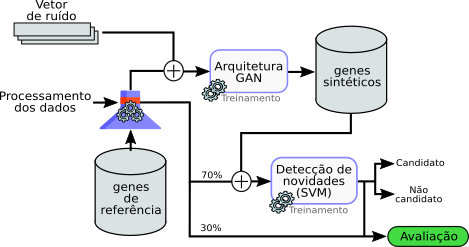

In [2]:
from PIL import Image
print("-----------------")
print("Proposed Method")
print("-----------------")
Image.open("../images/methodology_quali.png")

### Loading the preprocessed data
- Reference Genes are also loaded. Note: the <b>idnT</b> gene is not taken into account due to the high Coefficient of Variation of its gene expression.

In [3]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [4]:
rg = open("../data/reference_genes.txt").read().splitlines()
print(rg)

['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [5]:
rg_data = data.reindex(rg).dropna()
rg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


### Scaling the data
- the data is scaled between -1 and 1 to facilitate the training of the GAN architecture

In [6]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(rg_data)
rg_data = scaler.transform(rg_data)
print("Reference genes scaled: ")
rg_data

Reference genes scaled: 


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


### building the GAN architecture

In [7]:
noise_shape = 50
#generator network
G = Sequential()
G.add(Dense(noise_shape, input_shape=(noise_shape,)))
G.add(Dropout(.1))
G.add(Dense(70))
G.add(Dropout(.15))
G.add(Dense(20))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
D.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D.add(Dense(9, activation="relu"))
D.add(Dense(30, activation="relu"))
D.add(Dense(9, activation="relu"))
D.add(Dense(1, activation="sigmoid"))

In [8]:
noise_vector = tf.random.normal((4, noise_shape), dtype=tf.float64)
print("synthetic samples: ")
synthetic_samples = G(noise_vector)
print(synthetic_samples)
print("----------------------------------------")
print("prediction of the discriminator network")
print("----------------------------------------")
D(synthetic_samples)

synthetic samples: 
tf.Tensor(
[[-0.99729566  0.83862864  0.99670338 -0.98437215 -0.95834443  0.06390943
   0.81733556 -0.88852017 -0.81429532]
 [ 0.99691727 -0.25782753  0.97103582  0.99794564 -0.78480264  0.99233966
   0.38053207  0.98468386 -0.99909685]
 [ 0.99849902 -0.84694171 -0.94838327  0.93628807  0.91779702  0.71447281
  -0.27710386  0.99664367 -0.9897457 ]
 [ 0.20031561 -0.79530234  0.7832616   0.02414532 -0.58790494  0.87412428
  -0.98688318  0.03948506 -0.2450427 ]], shape=(4, 9), dtype=float64)
----------------------------------------
prediction of the discriminator network
----------------------------------------


<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.47518724],
       [0.47043793],
       [0.46446847],
       [0.41913564]])>

In [9]:
gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1000
optimizerG = tf.optimizers.SGD()
optimizerD = tf.optimizers.SGD()
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_shape, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1000] :: G_loss[0.874245] :: D_loss[0.662718] :: time:0.967139[s]
epochs[1:1000] :: G_loss[0.821986] :: D_loss[0.678400] :: time:0.008894[s]
epochs[2:1000] :: G_loss[0.870755] :: D_loss[0.665450] :: time:0.008804[s]
epochs[3:1000] :: G_loss[0.886215] :: D_loss[0.659714] :: time:0.008825[s]
epochs[4:1000] :: G_loss[0.916521] :: D_loss[0.651341] :: time:0.008678[s]
epochs[5:1000] :: G_loss[0.944111] :: D_loss[0.642211] :: time:0.008719[s]
epochs[6:1000] :: G_loss[0.926466] :: D_loss[0.649847] :: time:0.008774[s]
epochs[7:1000] :: G_loss[0.858393] :: D_loss[0.669421] :: time:0.008709[s]
epochs[8:1000] :: G_loss[0.919052] :: D_loss[0.645470] :: time:0.008715[s]
epochs[9:1000] :: G_loss[0.922714] :: D_loss[0.649420] :: time:0.011027[s]
epochs[10:1000] :: G_loss[0.906066] :: D_loss[0.652508] :: time:0.009095[s]
epochs[11:1000] :: G_loss[0.901863] :: D_loss[0.650044] :: time:0.008744[s]
epochs[12:1000] :: G_loss[0.778231] :: D_loss[0.694076] :: time:0.008792[s]
epochs[13:1000] :: G_l

epochs[114:1000] :: G_loss[0.816379] :: D_loss[0.657331] :: time:0.013676[s]
epochs[115:1000] :: G_loss[0.789052] :: D_loss[0.671833] :: time:0.014481[s]
epochs[116:1000] :: G_loss[0.812850] :: D_loss[0.660079] :: time:0.014026[s]
epochs[117:1000] :: G_loss[0.750373] :: D_loss[0.685175] :: time:0.012081[s]
epochs[118:1000] :: G_loss[0.812658] :: D_loss[0.659968] :: time:0.008936[s]
epochs[119:1000] :: G_loss[0.756340] :: D_loss[0.683099] :: time:0.009261[s]
epochs[120:1000] :: G_loss[0.783144] :: D_loss[0.670585] :: time:0.009042[s]
epochs[121:1000] :: G_loss[0.745762] :: D_loss[0.686261] :: time:0.008977[s]
epochs[122:1000] :: G_loss[0.786413] :: D_loss[0.669978] :: time:0.008761[s]
epochs[123:1000] :: G_loss[0.795048] :: D_loss[0.666375] :: time:0.008659[s]
epochs[124:1000] :: G_loss[0.774564] :: D_loss[0.673528] :: time:0.008804[s]
epochs[125:1000] :: G_loss[0.800278] :: D_loss[0.666259] :: time:0.008766[s]
epochs[126:1000] :: G_loss[0.811762] :: D_loss[0.658737] :: time:0.008808[s]

epochs[227:1000] :: G_loss[0.780958] :: D_loss[0.663027] :: time:0.012659[s]
epochs[228:1000] :: G_loss[0.748419] :: D_loss[0.677965] :: time:0.012465[s]
epochs[229:1000] :: G_loss[0.764859] :: D_loss[0.670084] :: time:0.008993[s]
epochs[230:1000] :: G_loss[0.796536] :: D_loss[0.656486] :: time:0.009016[s]
epochs[231:1000] :: G_loss[0.742613] :: D_loss[0.680156] :: time:0.008717[s]
epochs[232:1000] :: G_loss[0.787341] :: D_loss[0.662155] :: time:0.008728[s]
epochs[233:1000] :: G_loss[0.769822] :: D_loss[0.668247] :: time:0.008749[s]
epochs[234:1000] :: G_loss[0.780100] :: D_loss[0.662129] :: time:0.008747[s]
epochs[235:1000] :: G_loss[0.773457] :: D_loss[0.664982] :: time:0.008743[s]
epochs[236:1000] :: G_loss[0.754458] :: D_loss[0.675999] :: time:0.008834[s]
epochs[237:1000] :: G_loss[0.784038] :: D_loss[0.662008] :: time:0.008762[s]
epochs[238:1000] :: G_loss[0.751601] :: D_loss[0.676236] :: time:0.008878[s]
epochs[239:1000] :: G_loss[0.774065] :: D_loss[0.664729] :: time:0.008850[s]

epochs[342:1000] :: G_loss[0.823580] :: D_loss[0.646742] :: time:0.012289[s]
epochs[343:1000] :: G_loss[0.733599] :: D_loss[0.681202] :: time:0.011498[s]
epochs[344:1000] :: G_loss[0.724924] :: D_loss[0.684705] :: time:0.009356[s]
epochs[345:1000] :: G_loss[0.757083] :: D_loss[0.669191] :: time:0.009339[s]
epochs[346:1000] :: G_loss[0.768733] :: D_loss[0.664532] :: time:0.008752[s]
epochs[347:1000] :: G_loss[0.747013] :: D_loss[0.673205] :: time:0.008767[s]
epochs[348:1000] :: G_loss[0.739216] :: D_loss[0.676309] :: time:0.008950[s]
epochs[349:1000] :: G_loss[0.729498] :: D_loss[0.682515] :: time:0.008790[s]
epochs[350:1000] :: G_loss[0.747442] :: D_loss[0.674458] :: time:0.008758[s]
epochs[351:1000] :: G_loss[0.781737] :: D_loss[0.662423] :: time:0.008878[s]
epochs[352:1000] :: G_loss[0.725393] :: D_loss[0.682888] :: time:0.009095[s]
epochs[353:1000] :: G_loss[0.737057] :: D_loss[0.677751] :: time:0.008751[s]
epochs[354:1000] :: G_loss[0.757262] :: D_loss[0.669604] :: time:0.008717[s]

epochs[455:1000] :: G_loss[0.721366] :: D_loss[0.686071] :: time:0.008871[s]
epochs[456:1000] :: G_loss[0.722815] :: D_loss[0.682969] :: time:0.011069[s]
epochs[457:1000] :: G_loss[0.733858] :: D_loss[0.677621] :: time:0.009363[s]
epochs[458:1000] :: G_loss[0.703233] :: D_loss[0.691864] :: time:0.009275[s]
epochs[459:1000] :: G_loss[0.764298] :: D_loss[0.664097] :: time:0.008867[s]
epochs[460:1000] :: G_loss[0.762892] :: D_loss[0.666050] :: time:0.008994[s]
epochs[461:1000] :: G_loss[0.714657] :: D_loss[0.687571] :: time:0.009000[s]
epochs[462:1000] :: G_loss[0.758734] :: D_loss[0.668174] :: time:0.008729[s]
epochs[463:1000] :: G_loss[0.693408] :: D_loss[0.696942] :: time:0.009122[s]
epochs[464:1000] :: G_loss[0.747480] :: D_loss[0.670643] :: time:0.008694[s]
epochs[465:1000] :: G_loss[0.761491] :: D_loss[0.666823] :: time:0.008827[s]
epochs[466:1000] :: G_loss[0.743987] :: D_loss[0.676333] :: time:0.008826[s]
epochs[467:1000] :: G_loss[0.686454] :: D_loss[0.700361] :: time:0.008754[s]

epochs[568:1000] :: G_loss[0.736385] :: D_loss[0.678053] :: time:0.010984[s]
epochs[569:1000] :: G_loss[0.693376] :: D_loss[0.695083] :: time:0.009503[s]
epochs[570:1000] :: G_loss[0.708624] :: D_loss[0.687845] :: time:0.009254[s]
epochs[571:1000] :: G_loss[0.740822] :: D_loss[0.675204] :: time:0.008856[s]
epochs[572:1000] :: G_loss[0.703459] :: D_loss[0.689654] :: time:0.008961[s]
epochs[573:1000] :: G_loss[0.706290] :: D_loss[0.688932] :: time:0.008696[s]
epochs[574:1000] :: G_loss[0.706933] :: D_loss[0.690631] :: time:0.008761[s]
epochs[575:1000] :: G_loss[0.663266] :: D_loss[0.711757] :: time:0.008895[s]
epochs[576:1000] :: G_loss[0.672741] :: D_loss[0.705720] :: time:0.008790[s]
epochs[577:1000] :: G_loss[0.701839] :: D_loss[0.692585] :: time:0.008982[s]
epochs[578:1000] :: G_loss[0.712077] :: D_loss[0.686307] :: time:0.008879[s]
epochs[579:1000] :: G_loss[0.691787] :: D_loss[0.696099] :: time:0.008906[s]
epochs[580:1000] :: G_loss[0.706606] :: D_loss[0.689352] :: time:0.008835[s]

epochs[683:1000] :: G_loss[0.671657] :: D_loss[0.707160] :: time:0.010037[s]
epochs[684:1000] :: G_loss[0.695812] :: D_loss[0.695045] :: time:0.010974[s]
epochs[685:1000] :: G_loss[0.716035] :: D_loss[0.685646] :: time:0.008836[s]
epochs[686:1000] :: G_loss[0.699958] :: D_loss[0.694832] :: time:0.009118[s]
epochs[687:1000] :: G_loss[0.702412] :: D_loss[0.691377] :: time:0.008937[s]
epochs[688:1000] :: G_loss[0.700961] :: D_loss[0.692865] :: time:0.008908[s]
epochs[689:1000] :: G_loss[0.693535] :: D_loss[0.696703] :: time:0.008842[s]
epochs[690:1000] :: G_loss[0.681970] :: D_loss[0.701289] :: time:0.008798[s]
epochs[691:1000] :: G_loss[0.709565] :: D_loss[0.688834] :: time:0.008831[s]
epochs[692:1000] :: G_loss[0.693581] :: D_loss[0.695172] :: time:0.008899[s]
epochs[693:1000] :: G_loss[0.668195] :: D_loss[0.708510] :: time:0.008983[s]
epochs[694:1000] :: G_loss[0.736643] :: D_loss[0.674506] :: time:0.008903[s]
epochs[695:1000] :: G_loss[0.710150] :: D_loss[0.687718] :: time:0.008916[s]

epochs[797:1000] :: G_loss[0.754910] :: D_loss[0.668444] :: time:0.010357[s]
epochs[798:1000] :: G_loss[0.724657] :: D_loss[0.682170] :: time:0.010674[s]
epochs[799:1000] :: G_loss[0.718374] :: D_loss[0.686401] :: time:0.008858[s]
epochs[800:1000] :: G_loss[0.692417] :: D_loss[0.697620] :: time:0.009222[s]
epochs[801:1000] :: G_loss[0.733643] :: D_loss[0.678557] :: time:0.009001[s]
epochs[802:1000] :: G_loss[0.729915] :: D_loss[0.680883] :: time:0.008863[s]
epochs[803:1000] :: G_loss[0.751723] :: D_loss[0.670623] :: time:0.008942[s]
epochs[804:1000] :: G_loss[0.741996] :: D_loss[0.674920] :: time:0.008861[s]
epochs[805:1000] :: G_loss[0.732313] :: D_loss[0.679187] :: time:0.009158[s]
epochs[806:1000] :: G_loss[0.721908] :: D_loss[0.683305] :: time:0.008817[s]
epochs[807:1000] :: G_loss[0.719620] :: D_loss[0.685162] :: time:0.008877[s]
epochs[808:1000] :: G_loss[0.714469] :: D_loss[0.687551] :: time:0.008923[s]
epochs[809:1000] :: G_loss[0.715934] :: D_loss[0.686485] :: time:0.008758[s]

epochs[912:1000] :: G_loss[0.735978] :: D_loss[0.679472] :: time:0.010034[s]
epochs[913:1000] :: G_loss[0.736540] :: D_loss[0.679284] :: time:0.010667[s]
epochs[914:1000] :: G_loss[0.745533] :: D_loss[0.675446] :: time:0.008856[s]
epochs[915:1000] :: G_loss[0.753473] :: D_loss[0.672462] :: time:0.009297[s]
epochs[916:1000] :: G_loss[0.726822] :: D_loss[0.683256] :: time:0.008862[s]
epochs[917:1000] :: G_loss[0.732085] :: D_loss[0.681779] :: time:0.008798[s]
epochs[918:1000] :: G_loss[0.746514] :: D_loss[0.674412] :: time:0.008845[s]
epochs[919:1000] :: G_loss[0.762806] :: D_loss[0.666967] :: time:0.008770[s]
epochs[920:1000] :: G_loss[0.732639] :: D_loss[0.682106] :: time:0.008780[s]
epochs[921:1000] :: G_loss[0.736320] :: D_loss[0.679296] :: time:0.008931[s]
epochs[922:1000] :: G_loss[0.735904] :: D_loss[0.679606] :: time:0.008784[s]
epochs[923:1000] :: G_loss[0.746184] :: D_loss[0.674460] :: time:0.008802[s]
epochs[924:1000] :: G_loss[0.760932] :: D_loss[0.669195] :: time:0.008906[s]

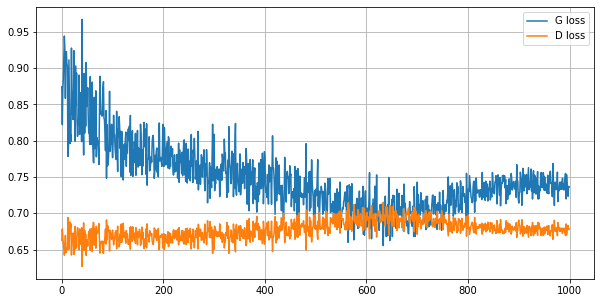

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss")
plt.plot(range(epochs), accumulated_dloss, label="D loss")
plt.legend()
plt.grid();

In [11]:
noise_vector = tf.random.normal((200,noise_shape))
synthetic_samples = gan_utils.G(noise_vector)
synthetic_samples.shape

TensorShape([200, 9])

In [12]:
pca = PCA(n_components=2)
rg_data_pca = pca.fit_transform(rg_data)
synthetic_samples_pca = pca.transform(synthetic_samples)
print(rg_data_pca.shape, synthetic_samples_pca.shape)

(20, 2) (200, 2)


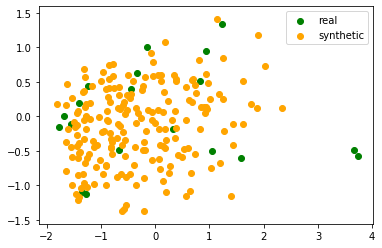

In [13]:
plt.scatter(rg_data_pca[:,0], rg_data_pca[:,1], color="green", label="real");
plt.scatter(synthetic_samples_pca[:,0], synthetic_samples_pca[:,1], color="orange", label="synthetic")
plt.legend();

###  Analysis of the synthetic sample

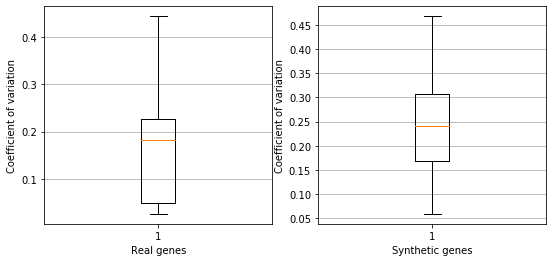

In [14]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
rg = scaler.inverse_transform(rg_data)
plt.boxplot(rg.std(axis=1)/rg.mean(axis=1))
plt.grid(axis="y")
plt.xlabel("Real genes")
plt.ylabel("Coefficient of variation");
plt.subplot(1,2,2)
syn = scaler.inverse_transform(synthetic_samples.numpy())
plt.boxplot(syn.std(axis=1)/syn.mean(axis=1));
plt.grid(axis="y")
plt.xlabel("Synthetic genes")
plt.ylabel("Coefficient of variation");

In [15]:
percentages = np.arange(25, 1000, 25)
percentages

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650,
       675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975])

In [18]:
num_folds = 4
num_iter = 15
train_mean_score_p = []
train_std_score_p = []
test_mean_score_p = []
test_std_score_p = []
for p in percentages:
    tic = time()
    noise_vector = tf.random.normal(shape=(int((rg_data.shape[0]*p)/100), noise_shape))
    synthetic_genes = gan_utils.G(noise_vector).numpy()
    #the ocsvm utilities not works with pandas Dataframe due the structure is very slow
    augmented_data = np.concatenate((rg_data, synthetic_genes), axis=0)
    obj = EdwinRueda_utils.ocsvm_utilities(augmented_data, np.ones(augmented_data.shape[0]),k_folds=num_folds)
    nu_params = 30
    params = {"nu":np.linspace(.001,0.5, nu_params)}
    train_score, test_score = obj.get_best_params(params, n_iter=num_iter)
    train_recall_score, test_recall_score = obj.get_statistics(iterations=30, test_size=.3)
    #train params
    train_mean_score_p.append(np.mean(np.array(train_recall_score)))
    train_std_score_p.append(np.std(np.array(train_recall_score)))
    #test params
    test_mean_score_p.append(np.mean(np.array(test_recall_score)))
    test_std_score_p.append(np.std(np.array(test_recall_score)))
    toc = time()
    print("{} | data_shape: {} | : time: {} [s]".format(p, augmented_data.shape, toc-tic))
    #break

25 | data_shape: (25, 9) | : time: 2.264862537384033 [s]
50 | data_shape: (30, 9) | : time: 2.28621506690979 [s]
75 | data_shape: (35, 9) | : time: 2.336509943008423 [s]
100 | data_shape: (40, 9) | : time: 2.3907177448272705 [s]
125 | data_shape: (45, 9) | : time: 2.4511287212371826 [s]
150 | data_shape: (50, 9) | : time: 2.5044445991516113 [s]
175 | data_shape: (55, 9) | : time: 2.5712356567382812 [s]
200 | data_shape: (60, 9) | : time: 2.6258561611175537 [s]
225 | data_shape: (65, 9) | : time: 2.7278225421905518 [s]
250 | data_shape: (70, 9) | : time: 3.9578945636749268 [s]
275 | data_shape: (75, 9) | : time: 3.5572073459625244 [s]
300 | data_shape: (80, 9) | : time: 3.126981496810913 [s]
325 | data_shape: (85, 9) | : time: 2.942586898803711 [s]
350 | data_shape: (90, 9) | : time: 3.0227301120758057 [s]
375 | data_shape: (95, 9) | : time: 3.1066701412200928 [s]
400 | data_shape: (100, 9) | : time: 3.1569042205810547 [s]
425 | data_shape: (105, 9) | : time: 3.2484326362609863 [s]
450 

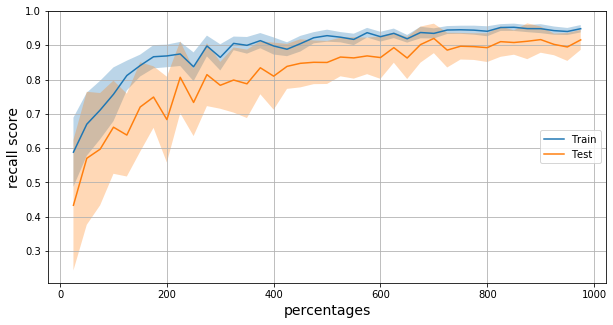

In [19]:
plt.figure(figsize=(10,5))
plt.plot(percentages, train_mean_score_p, label="Train");
plt.fill_between(percentages, np.array(train_mean_score_p)-np.array(train_std_score_p),
                np.array(train_mean_score_p)+np.array(train_std_score_p), alpha=.3)
#test results
plt.plot(percentages, test_mean_score_p, label="Test")
plt.fill_between(percentages, np.array(test_mean_score_p)-np.array(test_std_score_p),
                np.array(test_mean_score_p)+np.array(test_std_score_p), alpha=.3)
plt.grid()
plt.ylabel("recall score", fontsize=14)
plt.xlabel("percentages", fontsize=14)
plt.legend(loc="center right");

### Tuning parameters

In [21]:
noise_shape = 50
#generator network
G = Sequential()
G.add(Dense(noise_shape, input_shape=(noise_shape,)))
G.add(Dense(150))
G.add(Dropout(.15))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
D.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D.add(Dense(32))
D.add(tf.keras.layers.LeakyReLU(.1))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1600
optimizerG = tf.optimizers.SGD(learning_rate=0.00015, momentum=.92, decay=0.00015/epochs)
optimizerD = tf.optimizers.SGD(learning_rate=0.001, momentum=.9, decay=0.001/epochs)
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_shape, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1600] :: G_loss[0.537027] :: D_loss[0.659931] :: time:0.543862[s]
epochs[1:1600] :: G_loss[0.591140] :: D_loss[0.626553] :: time:0.008674[s]
epochs[2:1600] :: G_loss[0.529120] :: D_loss[0.665057] :: time:0.008760[s]
epochs[3:1600] :: G_loss[0.523095] :: D_loss[0.671923] :: time:0.008485[s]
epochs[4:1600] :: G_loss[0.540164] :: D_loss[0.660139] :: time:0.008568[s]
epochs[5:1600] :: G_loss[0.532177] :: D_loss[0.660217] :: time:0.008479[s]
epochs[6:1600] :: G_loss[0.600636] :: D_loss[0.620600] :: time:0.008504[s]
epochs[7:1600] :: G_loss[0.512606] :: D_loss[0.681575] :: time:0.008530[s]
epochs[8:1600] :: G_loss[0.576020] :: D_loss[0.630035] :: time:0.008434[s]
epochs[9:1600] :: G_loss[0.517717] :: D_loss[0.664794] :: time:0.008464[s]
epochs[10:1600] :: G_loss[0.555405] :: D_loss[0.646223] :: time:0.008730[s]
epochs[11:1600] :: G_loss[0.556180] :: D_loss[0.666761] :: time:0.008668[s]
epochs[12:1600] :: G_loss[0.591310] :: D_loss[0.624694] :: time:0.008448[s]
epochs[13:1600] :: G_l

epochs[114:1600] :: G_loss[0.735715] :: D_loss[0.576366] :: time:0.012808[s]
epochs[115:1600] :: G_loss[0.889825] :: D_loss[0.517415] :: time:0.009523[s]
epochs[116:1600] :: G_loss[0.852680] :: D_loss[0.528428] :: time:0.012593[s]
epochs[117:1600] :: G_loss[0.804769] :: D_loss[0.550928] :: time:0.011313[s]
epochs[118:1600] :: G_loss[0.858190] :: D_loss[0.524734] :: time:0.010660[s]
epochs[119:1600] :: G_loss[0.792696] :: D_loss[0.571912] :: time:0.011122[s]
epochs[120:1600] :: G_loss[0.807688] :: D_loss[0.546434] :: time:0.015144[s]
epochs[121:1600] :: G_loss[0.749255] :: D_loss[0.582054] :: time:0.016904[s]
epochs[122:1600] :: G_loss[0.816593] :: D_loss[0.542905] :: time:0.011677[s]
epochs[123:1600] :: G_loss[0.843074] :: D_loss[0.535241] :: time:0.009060[s]
epochs[124:1600] :: G_loss[0.713239] :: D_loss[0.608958] :: time:0.010117[s]
epochs[125:1600] :: G_loss[0.805161] :: D_loss[0.540630] :: time:0.012732[s]
epochs[126:1600] :: G_loss[0.780279] :: D_loss[0.556157] :: time:0.011436[s]

epochs[242:1600] :: G_loss[0.905362] :: D_loss[0.535540] :: time:0.011038[s]
epochs[243:1600] :: G_loss[0.862454] :: D_loss[0.532923] :: time:0.012501[s]
epochs[244:1600] :: G_loss[0.833292] :: D_loss[0.559494] :: time:0.008620[s]
epochs[245:1600] :: G_loss[0.880237] :: D_loss[0.549632] :: time:0.008528[s]
epochs[246:1600] :: G_loss[0.897198] :: D_loss[0.538022] :: time:0.008625[s]
epochs[247:1600] :: G_loss[0.991329] :: D_loss[0.499654] :: time:0.008461[s]
epochs[248:1600] :: G_loss[0.857274] :: D_loss[0.553843] :: time:0.008423[s]
epochs[249:1600] :: G_loss[0.904453] :: D_loss[0.531084] :: time:0.008475[s]
epochs[250:1600] :: G_loss[1.051435] :: D_loss[0.480202] :: time:0.008543[s]
epochs[251:1600] :: G_loss[0.938252] :: D_loss[0.540727] :: time:0.008475[s]
epochs[252:1600] :: G_loss[0.967349] :: D_loss[0.505557] :: time:0.008523[s]
epochs[253:1600] :: G_loss[0.821409] :: D_loss[0.560022] :: time:0.008516[s]
epochs[254:1600] :: G_loss[0.903697] :: D_loss[0.524227] :: time:0.008507[s]

epochs[357:1600] :: G_loss[0.895089] :: D_loss[0.570067] :: time:0.010002[s]
epochs[358:1600] :: G_loss[0.890096] :: D_loss[0.560712] :: time:0.023590[s]
epochs[359:1600] :: G_loss[0.880810] :: D_loss[0.592243] :: time:0.017932[s]
epochs[360:1600] :: G_loss[0.886789] :: D_loss[0.595919] :: time:0.014064[s]
epochs[361:1600] :: G_loss[0.997979] :: D_loss[0.535408] :: time:0.014637[s]
epochs[362:1600] :: G_loss[0.828937] :: D_loss[0.583070] :: time:0.014745[s]
epochs[363:1600] :: G_loss[0.873639] :: D_loss[0.585573] :: time:0.011545[s]
epochs[364:1600] :: G_loss[0.895084] :: D_loss[0.567208] :: time:0.017475[s]
epochs[365:1600] :: G_loss[1.018577] :: D_loss[0.529245] :: time:0.008678[s]
epochs[366:1600] :: G_loss[0.894024] :: D_loss[0.585463] :: time:0.008622[s]
epochs[367:1600] :: G_loss[0.771533] :: D_loss[0.616627] :: time:0.015754[s]
epochs[368:1600] :: G_loss[1.003707] :: D_loss[0.520688] :: time:0.017968[s]
epochs[369:1600] :: G_loss[0.840784] :: D_loss[0.590444] :: time:0.011910[s]

epochs[481:1600] :: G_loss[0.933682] :: D_loss[0.582454] :: time:0.009381[s]
epochs[482:1600] :: G_loss[1.040672] :: D_loss[0.554834] :: time:0.010521[s]
epochs[483:1600] :: G_loss[1.049224] :: D_loss[0.539786] :: time:0.008811[s]
epochs[484:1600] :: G_loss[0.938439] :: D_loss[0.577743] :: time:0.008836[s]
epochs[485:1600] :: G_loss[0.938821] :: D_loss[0.606586] :: time:0.008528[s]
epochs[486:1600] :: G_loss[1.020114] :: D_loss[0.529555] :: time:0.008705[s]
epochs[487:1600] :: G_loss[1.040645] :: D_loss[0.567118] :: time:0.008973[s]
epochs[488:1600] :: G_loss[1.028396] :: D_loss[0.555067] :: time:0.008738[s]
epochs[489:1600] :: G_loss[0.933081] :: D_loss[0.568213] :: time:0.008537[s]
epochs[490:1600] :: G_loss[0.949426] :: D_loss[0.586989] :: time:0.008598[s]
epochs[491:1600] :: G_loss[1.074495] :: D_loss[0.516758] :: time:0.008710[s]
epochs[492:1600] :: G_loss[0.912629] :: D_loss[0.592823] :: time:0.008564[s]
epochs[493:1600] :: G_loss[1.025231] :: D_loss[0.559631] :: time:0.008615[s]

epochs[596:1600] :: G_loss[0.994624] :: D_loss[0.566334] :: time:0.011160[s]
epochs[597:1600] :: G_loss[0.958526] :: D_loss[0.598275] :: time:0.011949[s]
epochs[598:1600] :: G_loss[0.899723] :: D_loss[0.624957] :: time:0.008622[s]
epochs[599:1600] :: G_loss[1.001368] :: D_loss[0.580313] :: time:0.008825[s]
epochs[600:1600] :: G_loss[0.971175] :: D_loss[0.591149] :: time:0.008819[s]
epochs[601:1600] :: G_loss[0.960133] :: D_loss[0.596695] :: time:0.008603[s]
epochs[602:1600] :: G_loss[0.911772] :: D_loss[0.625957] :: time:0.008519[s]
epochs[603:1600] :: G_loss[0.920386] :: D_loss[0.613622] :: time:0.008653[s]
epochs[604:1600] :: G_loss[0.879926] :: D_loss[0.649174] :: time:0.008813[s]
epochs[605:1600] :: G_loss[0.916823] :: D_loss[0.597029] :: time:0.008666[s]
epochs[606:1600] :: G_loss[0.869201] :: D_loss[0.643051] :: time:0.008548[s]
epochs[607:1600] :: G_loss[0.846374] :: D_loss[0.668544] :: time:0.008541[s]
epochs[608:1600] :: G_loss[1.074817] :: D_loss[0.546065] :: time:0.008631[s]

epochs[711:1600] :: G_loss[0.945978] :: D_loss[0.626832] :: time:0.010165[s]
epochs[712:1600] :: G_loss[0.974389] :: D_loss[0.603125] :: time:0.012156[s]
epochs[713:1600] :: G_loss[0.833621] :: D_loss[0.654065] :: time:0.008968[s]
epochs[714:1600] :: G_loss[0.909747] :: D_loss[0.619090] :: time:0.008857[s]
epochs[715:1600] :: G_loss[0.917542] :: D_loss[0.611538] :: time:0.008583[s]
epochs[716:1600] :: G_loss[0.876933] :: D_loss[0.626698] :: time:0.008730[s]
epochs[717:1600] :: G_loss[0.878533] :: D_loss[0.649945] :: time:0.008590[s]
epochs[718:1600] :: G_loss[0.886846] :: D_loss[0.642622] :: time:0.008633[s]
epochs[719:1600] :: G_loss[0.999784] :: D_loss[0.595413] :: time:0.008600[s]
epochs[720:1600] :: G_loss[0.925163] :: D_loss[0.620326] :: time:0.008937[s]
epochs[721:1600] :: G_loss[1.020221] :: D_loss[0.598007] :: time:0.008536[s]
epochs[722:1600] :: G_loss[0.841716] :: D_loss[0.654966] :: time:0.008671[s]
epochs[723:1600] :: G_loss[0.948256] :: D_loss[0.602445] :: time:0.008515[s]

epochs[826:1600] :: G_loss[0.978868] :: D_loss[0.612207] :: time:0.009897[s]
epochs[827:1600] :: G_loss[0.826416] :: D_loss[0.672139] :: time:0.010128[s]
epochs[828:1600] :: G_loss[0.809816] :: D_loss[0.674510] :: time:0.008857[s]
epochs[829:1600] :: G_loss[0.751968] :: D_loss[0.699534] :: time:0.008573[s]
epochs[830:1600] :: G_loss[0.858214] :: D_loss[0.659334] :: time:0.008932[s]
epochs[831:1600] :: G_loss[0.740219] :: D_loss[0.703041] :: time:0.008655[s]
epochs[832:1600] :: G_loss[0.702100] :: D_loss[0.727195] :: time:0.008695[s]
epochs[833:1600] :: G_loss[0.772234] :: D_loss[0.687543] :: time:0.008662[s]
epochs[834:1600] :: G_loss[0.835430] :: D_loss[0.669241] :: time:0.008546[s]
epochs[835:1600] :: G_loss[0.818802] :: D_loss[0.682018] :: time:0.008637[s]
epochs[836:1600] :: G_loss[0.777546] :: D_loss[0.704711] :: time:0.008638[s]
epochs[837:1600] :: G_loss[0.895713] :: D_loss[0.655404] :: time:0.008677[s]
epochs[838:1600] :: G_loss[0.833725] :: D_loss[0.677793] :: time:0.008636[s]

epochs[941:1600] :: G_loss[0.793780] :: D_loss[0.693892] :: time:0.010690[s]
epochs[942:1600] :: G_loss[0.804151] :: D_loss[0.682156] :: time:0.011303[s]
epochs[943:1600] :: G_loss[0.800552] :: D_loss[0.692666] :: time:0.008847[s]
epochs[944:1600] :: G_loss[0.794330] :: D_loss[0.695112] :: time:0.008685[s]
epochs[945:1600] :: G_loss[0.799404] :: D_loss[0.681336] :: time:0.008847[s]
epochs[946:1600] :: G_loss[0.907730] :: D_loss[0.642830] :: time:0.008573[s]
epochs[947:1600] :: G_loss[0.811576] :: D_loss[0.682811] :: time:0.008591[s]
epochs[948:1600] :: G_loss[0.975784] :: D_loss[0.619797] :: time:0.008603[s]
epochs[949:1600] :: G_loss[0.898722] :: D_loss[0.646398] :: time:0.008543[s]
epochs[950:1600] :: G_loss[0.903627] :: D_loss[0.642750] :: time:0.008571[s]
epochs[951:1600] :: G_loss[0.793682] :: D_loss[0.686708] :: time:0.008467[s]
epochs[952:1600] :: G_loss[0.798341] :: D_loss[0.695825] :: time:0.008616[s]
epochs[953:1600] :: G_loss[0.798320] :: D_loss[0.681732] :: time:0.008580[s]

epochs[1055:1600] :: G_loss[0.777600] :: D_loss[0.698891] :: time:0.010168[s]
epochs[1056:1600] :: G_loss[0.784617] :: D_loss[0.688499] :: time:0.010147[s]
epochs[1057:1600] :: G_loss[0.825373] :: D_loss[0.672550] :: time:0.008922[s]
epochs[1058:1600] :: G_loss[0.800233] :: D_loss[0.677505] :: time:0.008576[s]
epochs[1059:1600] :: G_loss[0.786995] :: D_loss[0.682568] :: time:0.008744[s]
epochs[1060:1600] :: G_loss[0.793094] :: D_loss[0.676645] :: time:0.008571[s]
epochs[1061:1600] :: G_loss[0.781870] :: D_loss[0.686184] :: time:0.008638[s]
epochs[1062:1600] :: G_loss[0.916828] :: D_loss[0.628218] :: time:0.008654[s]
epochs[1063:1600] :: G_loss[0.756397] :: D_loss[0.697506] :: time:0.008543[s]
epochs[1064:1600] :: G_loss[0.850811] :: D_loss[0.665917] :: time:0.008553[s]
epochs[1065:1600] :: G_loss[0.724063] :: D_loss[0.712615] :: time:0.008549[s]
epochs[1066:1600] :: G_loss[0.808043] :: D_loss[0.676443] :: time:0.008653[s]
epochs[1067:1600] :: G_loss[0.776312] :: D_loss[0.691152] :: tim

epochs[1170:1600] :: G_loss[0.926891] :: D_loss[0.631747] :: time:0.010027[s]
epochs[1171:1600] :: G_loss[0.853799] :: D_loss[0.652371] :: time:0.011223[s]
epochs[1172:1600] :: G_loss[0.785195] :: D_loss[0.680586] :: time:0.008692[s]
epochs[1173:1600] :: G_loss[0.771688] :: D_loss[0.684284] :: time:0.008867[s]
epochs[1174:1600] :: G_loss[0.833374] :: D_loss[0.662896] :: time:0.008597[s]
epochs[1175:1600] :: G_loss[0.881590] :: D_loss[0.642002] :: time:0.008772[s]
epochs[1176:1600] :: G_loss[0.806404] :: D_loss[0.675300] :: time:0.008486[s]
epochs[1177:1600] :: G_loss[0.728269] :: D_loss[0.701914] :: time:0.008536[s]
epochs[1178:1600] :: G_loss[0.789384] :: D_loss[0.679185] :: time:0.008646[s]
epochs[1179:1600] :: G_loss[0.799064] :: D_loss[0.668755] :: time:0.008677[s]
epochs[1180:1600] :: G_loss[0.937570] :: D_loss[0.626349] :: time:0.008538[s]
epochs[1181:1600] :: G_loss[0.815236] :: D_loss[0.666097] :: time:0.009350[s]
epochs[1182:1600] :: G_loss[0.846749] :: D_loss[0.654635] :: tim

epochs[1285:1600] :: G_loss[0.733772] :: D_loss[0.690943] :: time:0.010165[s]
epochs[1286:1600] :: G_loss[0.898712] :: D_loss[0.623827] :: time:0.011326[s]
epochs[1287:1600] :: G_loss[0.860142] :: D_loss[0.646441] :: time:0.008946[s]
epochs[1288:1600] :: G_loss[0.796508] :: D_loss[0.662358] :: time:0.008901[s]
epochs[1289:1600] :: G_loss[0.739634] :: D_loss[0.683710] :: time:0.008620[s]
epochs[1290:1600] :: G_loss[0.811881] :: D_loss[0.655280] :: time:0.008655[s]
epochs[1291:1600] :: G_loss[0.863488] :: D_loss[0.641597] :: time:0.008600[s]
epochs[1292:1600] :: G_loss[0.901162] :: D_loss[0.624089] :: time:0.008711[s]
epochs[1293:1600] :: G_loss[0.756121] :: D_loss[0.682587] :: time:0.008870[s]
epochs[1294:1600] :: G_loss[0.904335] :: D_loss[0.625460] :: time:0.008677[s]
epochs[1295:1600] :: G_loss[0.772980] :: D_loss[0.665729] :: time:0.008644[s]
epochs[1296:1600] :: G_loss[0.860774] :: D_loss[0.632177] :: time:0.008591[s]
epochs[1297:1600] :: G_loss[0.823088] :: D_loss[0.649098] :: tim

epochs[1400:1600] :: G_loss[0.747660] :: D_loss[0.685308] :: time:0.010168[s]
epochs[1401:1600] :: G_loss[0.775789] :: D_loss[0.672192] :: time:0.010084[s]
epochs[1402:1600] :: G_loss[0.799528] :: D_loss[0.664394] :: time:0.008980[s]
epochs[1403:1600] :: G_loss[0.765737] :: D_loss[0.673488] :: time:0.008574[s]
epochs[1404:1600] :: G_loss[0.901073] :: D_loss[0.629124] :: time:0.008915[s]
epochs[1405:1600] :: G_loss[0.835075] :: D_loss[0.650840] :: time:0.008606[s]
epochs[1406:1600] :: G_loss[0.840298] :: D_loss[0.646478] :: time:0.008639[s]
epochs[1407:1600] :: G_loss[0.713729] :: D_loss[0.695154] :: time:0.008618[s]
epochs[1408:1600] :: G_loss[0.781803] :: D_loss[0.670268] :: time:0.008473[s]
epochs[1409:1600] :: G_loss[0.818721] :: D_loss[0.653185] :: time:0.008512[s]
epochs[1410:1600] :: G_loss[0.815794] :: D_loss[0.657055] :: time:0.008705[s]
epochs[1411:1600] :: G_loss[0.785132] :: D_loss[0.666448] :: time:0.008600[s]
epochs[1412:1600] :: G_loss[0.767523] :: D_loss[0.667623] :: tim

epochs[1515:1600] :: G_loss[0.766582] :: D_loss[0.668047] :: time:0.009240[s]
epochs[1516:1600] :: G_loss[0.785088] :: D_loss[0.659464] :: time:0.011323[s]
epochs[1517:1600] :: G_loss[0.773689] :: D_loss[0.665884] :: time:0.009318[s]
epochs[1518:1600] :: G_loss[0.722737] :: D_loss[0.683768] :: time:0.008759[s]
epochs[1519:1600] :: G_loss[0.830872] :: D_loss[0.644314] :: time:0.008839[s]
epochs[1520:1600] :: G_loss[0.780483] :: D_loss[0.669456] :: time:0.008571[s]
epochs[1521:1600] :: G_loss[0.831569] :: D_loss[0.643752] :: time:0.008659[s]
epochs[1522:1600] :: G_loss[0.783574] :: D_loss[0.658227] :: time:0.008585[s]
epochs[1523:1600] :: G_loss[0.783991] :: D_loss[0.664849] :: time:0.008585[s]
epochs[1524:1600] :: G_loss[0.791497] :: D_loss[0.654576] :: time:0.008707[s]
epochs[1525:1600] :: G_loss[0.804895] :: D_loss[0.656020] :: time:0.008539[s]
epochs[1526:1600] :: G_loss[0.793647] :: D_loss[0.653308] :: time:0.008619[s]
epochs[1527:1600] :: G_loss[0.771789] :: D_loss[0.664776] :: tim

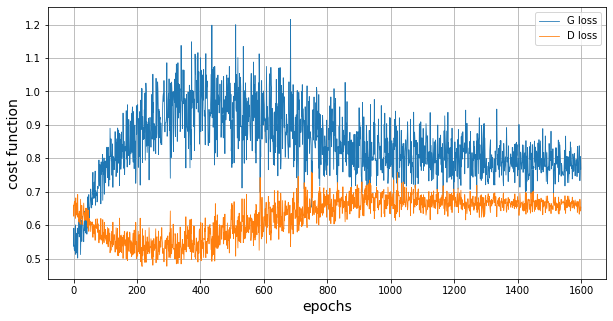

In [22]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss", linewidth=.8)
plt.plot(range(epochs), accumulated_dloss, label="D loss", linewidth=.8)
plt.xlabel("epochs", fontsize=14)
plt.ylabel("cost function", fontsize=14)
plt.legend()
plt.grid();

(20, 2) (200, 2)


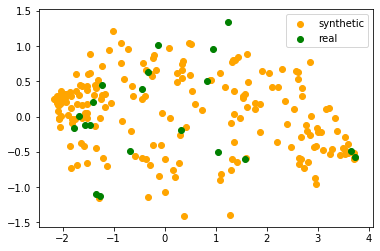

In [25]:
noise_vector = tf.random.normal((200,noise_shape))
synthetic_samples = gan_utils.G(noise_vector)
synthetic_samples.shape

pca = PCA(n_components=2)
rg_data_pca = pca.fit_transform(rg_data)
synthetic_samples_pca = pca.transform(synthetic_samples)
print(rg_data_pca.shape, synthetic_samples_pca.shape)

plt.scatter(synthetic_samples_pca[:,0], synthetic_samples_pca[:,1], color="orange", label="synthetic")
plt.scatter(rg_data_pca[:,0], rg_data_pca[:,1], color="green", label="real");
plt.legend();

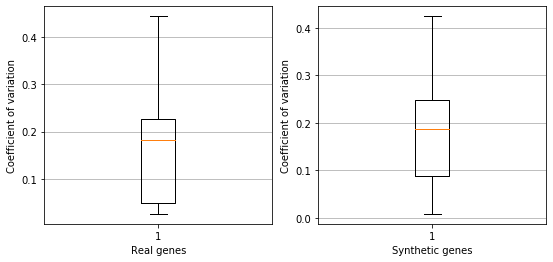

In [26]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
rg = scaler.inverse_transform(rg_data)
plt.boxplot(rg.std(axis=1)/rg.mean(axis=1))
plt.grid(axis="y")
plt.xlabel("Real genes")
plt.ylabel("Coefficient of variation");
plt.subplot(1,2,2)
syn = scaler.inverse_transform(synthetic_samples.numpy())
plt.boxplot(syn.std(axis=1)/syn.mean(axis=1));
plt.grid(axis="y")
plt.xlabel("Synthetic genes")
plt.ylabel("Coefficient of variation");

In [29]:
percentages = np.arange(25, 1000, 25)
num_folds = 4
num_iter = 15
train_mean_score_p = []
train_std_score_p = []
test_mean_score_p = []
test_std_score_p = []
for p in percentages:
    tic = time()
    noise_vector = tf.random.normal(shape=(int((rg_data.shape[0]*p)/100), noise_shape))
    synthetic_genes = gan_utils.G(noise_vector).numpy()
    augmented_data = np.concatenate((rg_data, synthetic_genes), axis=0)
    obj = EdwinRueda_utils.ocsvm_utilities(augmented_data, np.ones(augmented_data.shape[0]),k_folds=num_folds)
    nu_params = 30
    params = {"nu":np.linspace(.001,0.5, nu_params)}
    train_score, test_score = obj.get_best_params(params, n_iter=num_iter)
    train_recall_score, test_recall_score = obj.get_statistics(iterations=30, test_size=.3)
    #train params
    train_mean_score_p.append(np.mean(np.array(train_recall_score)))
    train_std_score_p.append(np.std(np.array(train_recall_score)))
    #test params
    test_mean_score_p.append(np.mean(np.array(test_recall_score)))
    test_std_score_p.append(np.std(np.array(test_recall_score)))
    toc = time()
    print("{}% | data_shape: {} | : time: {} [s]".format(p, augmented_data.shape, toc-tic))

25% | data_shape: (25, 9) | : time: 2.6563286781311035 [s]
50% | data_shape: (30, 9) | : time: 2.4405746459960938 [s]
75% | data_shape: (35, 9) | : time: 2.5420846939086914 [s]
100% | data_shape: (40, 9) | : time: 2.5234992504119873 [s]
125% | data_shape: (45, 9) | : time: 2.5945112705230713 [s]
150% | data_shape: (50, 9) | : time: 2.5648159980773926 [s]
175% | data_shape: (55, 9) | : time: 3.027817964553833 [s]
200% | data_shape: (60, 9) | : time: 2.9049675464630127 [s]
225% | data_shape: (65, 9) | : time: 2.9895153045654297 [s]
250% | data_shape: (70, 9) | : time: 2.9865763187408447 [s]
275% | data_shape: (75, 9) | : time: 3.0547735691070557 [s]
300% | data_shape: (80, 9) | : time: 3.110441207885742 [s]
325% | data_shape: (85, 9) | : time: 3.236257791519165 [s]
350% | data_shape: (90, 9) | : time: 3.2989017963409424 [s]
375% | data_shape: (95, 9) | : time: 3.27193546295166 [s]
400% | data_shape: (100, 9) | : time: 3.297673225402832 [s]
425% | data_shape: (105, 9) | : time: 3.36422252

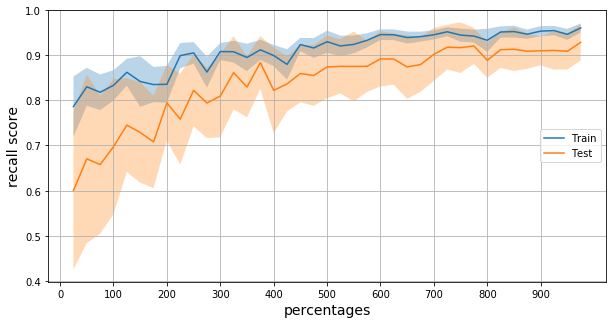

In [30]:
plt.figure(figsize=(10,5))
plt.plot(percentages, train_mean_score_p, label="Train");
plt.fill_between(percentages, np.array(train_mean_score_p)-np.array(train_std_score_p),
                np.array(train_mean_score_p)+np.array(train_std_score_p), alpha=.3)
#test results
plt.plot(percentages, test_mean_score_p, label="Test")
plt.fill_between(percentages, np.array(test_mean_score_p)-np.array(test_std_score_p),
                np.array(test_mean_score_p)+np.array(test_std_score_p), alpha=.3)
plt.grid()
plt.ylabel("recall score", fontsize=14)
plt.xlabel("percentages", fontsize=14)
plt.xticks(range(0,1000, 100), range(0,1000, 100))
plt.legend(loc="center right");